## Early Stopping implementation

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [18]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

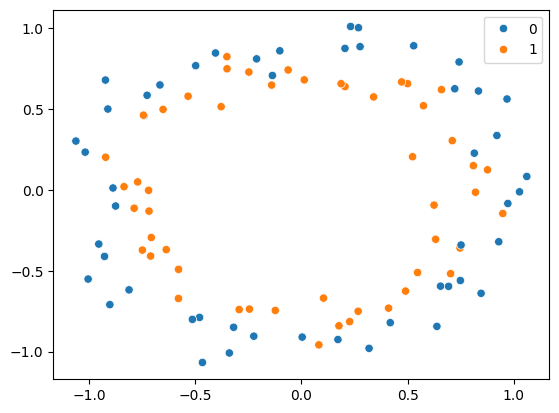

In [19]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [21]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2000, verbose=0)

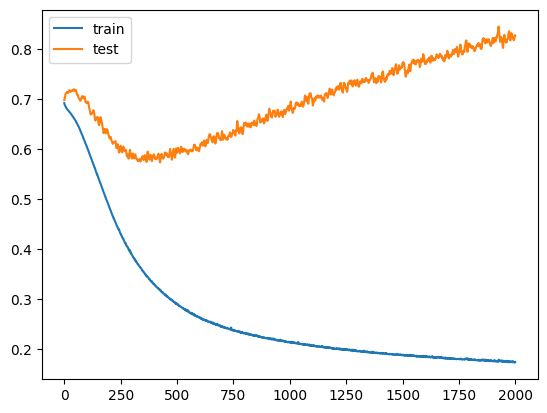

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


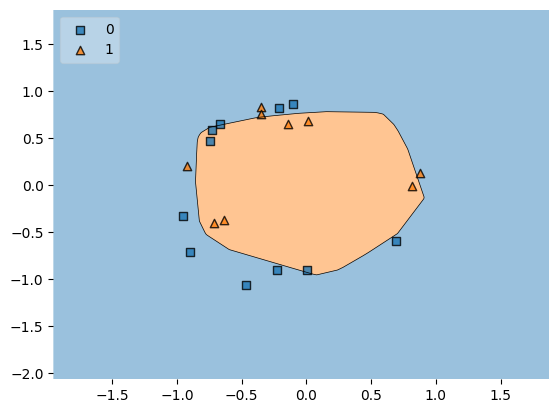

In [25]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [26]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [37]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2000, callbacks=callback)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5453 - loss: 0.6698 - val_accuracy: 0.4000 - val_loss: 0.7167
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5531 - loss: 0.6685 - val_accuracy: 0.4500 - val_loss: 0.7172
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5492 - loss: 0.6656 - val_accuracy: 0.4500 - val_loss: 0.7178
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5961 - loss: 0.6606 - val_accuracy: 0.4500 - val_loss: 0.7182
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5648 - loss: 0.6619 - val_accuracy: 0.4500 - val_loss: 0.7185
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6023 - loss: 0.6615 - val_accuracy: 0.4500 - val_loss: 0.7197
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6148 - loss: 0.6614 - val_accuracy: 0.4500 - val_loss: 0.7199
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6336 - loss: 0.6638 - val_accuracy: 0.4500 - v

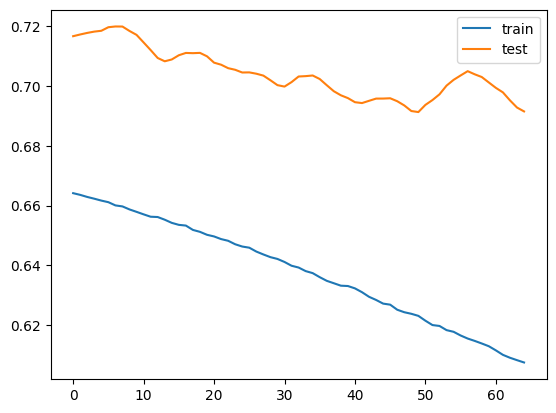

In [38]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


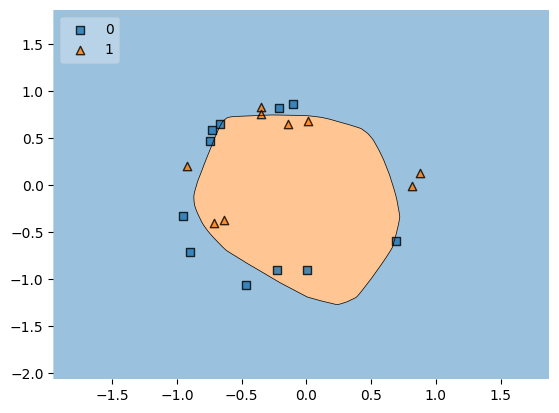

In [39]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()